In [8]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('train_features.csv')
test_df = pd.read_csv('test_features.csv')

In [4]:
train_df['IsTrain']= True
test_df['IsTrain'] = False

full = pd.concat([train_df,test_df])

# Length

(161.64680272108845, 360.778231292517)

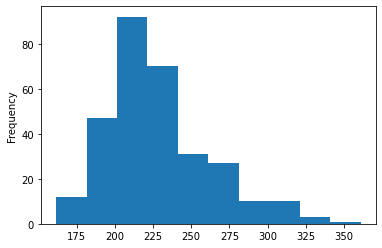

In [5]:
full.length.plot(kind='hist')
full.length.min(),full.length.max()

# Tempo

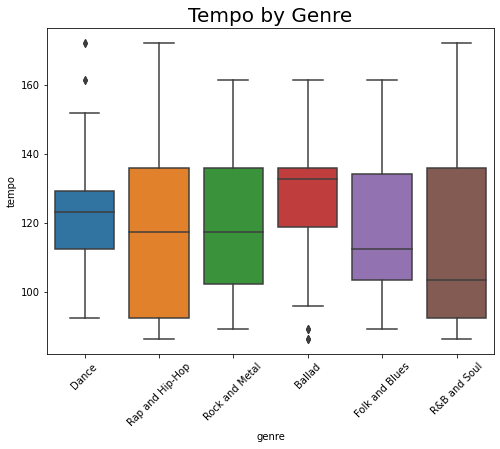

In [7]:
fig, ax = plt.subplots(figsize=(8,6));
sns.boxplot(x='genre',y='tempo',data=full.query('tempo!=0')[['genre','tempo']]);
plt.xticks(rotation=45);
plt.title('Tempo by Genre',fontsize=20);

# Key and Scale

In [9]:
list(train_df.key_name.unique())
order = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']

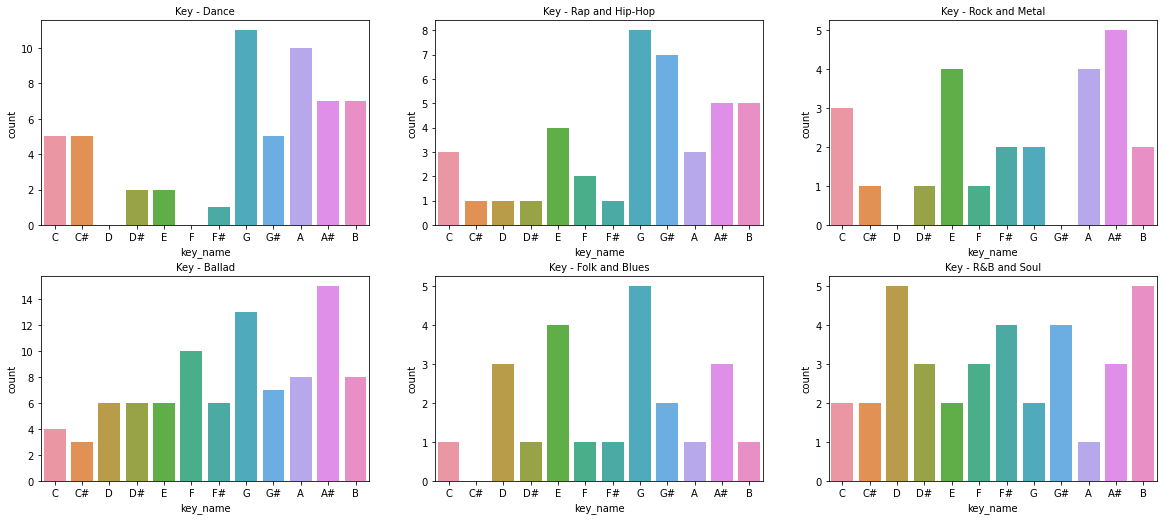

In [10]:
fig = plt.figure(figsize=(20,32))
fig.subplots_adjust(hspace=0.25)

for  i,g in enumerate(train_df.genre.unique()):
    df = train_df.query('genre==@g')
    ax = fig.add_subplot(7,3,i+1)
    
    img = sns.countplot(df.key_name,order = order )
    ax.set_title(f'Key - {g}', fontsize=10)
plt.show()

In [ ]:
df.scale

235    Major
236    minor
237    Major
238    minor
239    minor
240    minor
241    Major
242    minor
243    minor
244    Major
245    minor
246    minor
247    minor
248    Major
249    Major
250    minor
251    Major
252    minor
253    minor
254    minor
255    Major
256    minor
257    minor
258    minor
259    Major
260    minor
261    minor
262    minor
263    minor
264    minor
265    Major
266    Major
267    Major
268    minor
269    Major
270    minor
271    Major
Name: scale, dtype: object

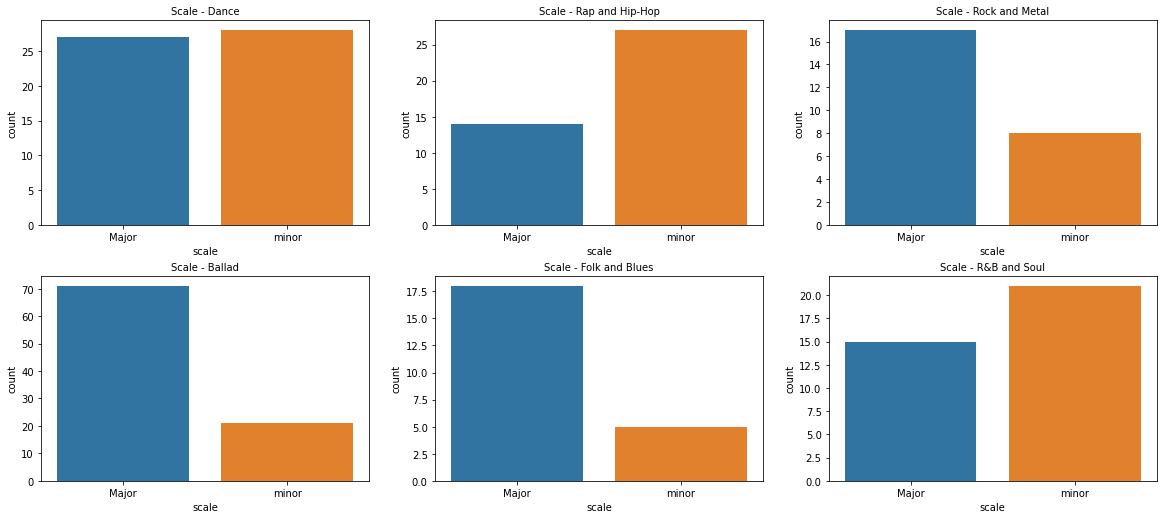

In [11]:
fig = plt.figure(figsize=(20,32))
fig.subplots_adjust(hspace=0.25)

for  i,g in enumerate(train_df.genre.unique()):
    df = train_df.query('genre==@g')
    ax = fig.add_subplot(7,3,i+1)
    
    img = sns.countplot(df.scale,order = ['Major','minor'] )
    ax.set_title(f'Scale - {g}', fontsize=10)
plt.show()

In [15]:
train_df['key'] = train_df.key.astype(int).astype('category')
test_df['key'] = test_df.key.astype(int).astype('category')


In [16]:
train_df['IsMajor'] = [1 if i =='Major' else 0 for i in train_df.scale]
test_df['IsMajor'] = [1 if i =='Major' else 0 for i in test_df.scale]

# Making a model

In [5]:
FEATURES = [
       'mean_stft', 'var_stft','tempo', 'rms_mean', 'rms_var',
       'centroid_mean', 'centroid_var', 'bandwidth_mean', 'bandwidth_var',
       'rolloff_mean', 'rolloff_var', 'crossing_mean', 'crossing_var',
       'harmonic_mean', 'harmonic_var', 'contrast_mean', 'contrast_var',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
       ]

TARGET = 'genre_id'

In [ ]:
train_df

,song_id,filename,filepath,genre_id,genre,length,mean_stft,var_stft,tempo,rms_mean,rms_var,centroid_mean,centroid_var,bandwidth_mean,bandwidth_var,rolloff_mean,rolloff_var,crossing_mean,crossing_var,harmonic_mean,harmonic_var,contrast_mean,contrast_var,key,key_name,scale,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,IsTrain,IsMajor
0,0,화사 (Hwa Sa)-02-마리아 (Maria)-María-192.mp3,/workspace/data/댄스/화사 (Hwa Sa)-02-마리아 ...,0,Dance,198.988844,0.370434,0.091871,129.199219,0.203743,0.005803,2093.400003,5.670470e+05,2152.073896,295716.881962,4374.708914,2.325346e+06,0.084110,0.002779,-2.118405e-04,0.078817,21.196754,47.777326,9,A,minor,-45.926277,10002.019,97.712880,1186.85400,-17.675762,563.16205,25.694958,671.10547,-10.719181,263.680200,11.249014,279.55862,0.201305,236.72635,-0.265758,358.82764,-5.018310,163.50539,12.692033,229.696120,-13.020501,151.146740,7.813152,142.390660,-3.978393,99.319260,6.417214,108.690000,-4.737688,84.673300,5.540300,91.877730,-7.345432,82.952600,5.599583,81.353870,-6.553307,70.27395,4.465244,85.759674,True,0
1,1,휘파람_BLACKPINK.mp3,/workspace/data/댄스/휘파람_BLACKPINK.mp3,0,Dance,211.723537,0.378364,0.100911,103.359375,0.181287,0.006679,2517.210706,1.191271e+06,2429.261027,277398.962992,5263.190421,4.038223e+06,0.104322,0.007956,1.038110e-05,0.068268,21.268880,59.434990,1,C#,minor,-78.970300,10166.334,70.601530,1865.03740,-7.189683,927.85700,23.905413,610.07320,-1.141728,466.277100,19.567194,439.22113,-7.120060,293.20892,16.375767,283.80026,-5.236860,199.81410,16.864376,210.793150,-10.289911,184.282140,13.210409,155.403990,-3.144653,135.485090,8.779571,114.619606,-4.993655,97.375460,5.470957,92.999530,-5.588277,88.601135,7.789039,89.126360,-1.958455,109.33650,5.275740,110.582610,True,0
2,2,여자친구(GFRIEND) - 03 - 너 그리고 나 (NAVILL...,/workspace/data/댄스/여자친구(GFRIEND) - 03 ...,0,Dance,193.594558,0.359479,0.084260,123.046875,0.203338,0.003686,3059.726479,3.549964e+05,2707.192556,68759.219111,6470.759821,1.177333e+06,0.156125,0.003209,-4.063748e-03,0.058146,19.932804,46.346004,1,C#,minor,27.711270,4577.274,64.672110,382.25000,-8.935600,269.70310,27.022686,178.84772,-7.711432,84.459404,15.512064,126.98102,-10.079503,75.70682,12.479667,100.00179,-10.617373,72.89811,11.346982,70.488660,-15.990921,71.357690,10.939192,79.497110,-9.906578,81.371150,8.712810,90.564230,-8.512220,67.222150,9.874558,75.714080,-6.710036,86.012200,6.021225,81.930110,-5.060828,76.34753,4.690906,71.586090,True,0
3,3,불장난_BLACKPINK.mp3,/workspace/data/댄스/불장난_BLACKPINK.mp3,0,Dance,197.303946,0.366499,0.094064,95.703125,0.157013,0.004782,2674.765273,7.745705e+05,2534.782627,352007.654898,5773.812439,3.303048e+06,0.112817,0.003597,7.420074e-04,0.041346,21.327604,50.089527,7,G,Major,-55.980990,8294.035,73.211174,1477.12680,-4.152730,758.59015,28.090680,437.88400,-4.298733,272.160000,15.760282,248.70270,-3.315135,141.23895,15.015367,179.88730,-6.858270,131.71860,17.075438,181.332700,-10.592443,113.306640,10.383768,121.101630,-8.334014,103.208820,7.106612,94.668760,-5.779556,101.306060,11.479845,123.954830,0.955210,114.705070,9.984463,119.163410,-0.186879,108.96550,8.000443,134.437850,True,1
4,4,MY MY_Apink (에이핑크).mp3,/workspace/data/댄스/MY MY_Apink (에이핑크).mp3,0,Dance,235.049796,0.375628,0.089973,107.666016,0.124924,0.003062,2635.045672,5.443986e+05,2569.791001,158397.396550,5711.083866,2.125625e+06,0.122183,0.004691,-1.519705e-07,0.026408,21.381058,52.323846,3,D#,Major,-69.251200,9021.539,75.563225,606.50775,-3.734478,442.74374,26.299402,226.08513,-2.647487,126.004190,15.354002,198.30020,-6.883274,146.

In [6]:
y_train = train_df[TARGET]
X_train = train_df[FEATURES]



In [7]:
y_test = test_df[TARGET]
X_test = test_df[FEATURES]


In [8]:
train_X = X_train
train_y = y_train
test_X = X_test
test_y = y_test

In [ ]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

preds=[]
scores = []

model = XGBClassifier(objective= 'multi:softmax',tree_method='gpu_hist',n_estimators=1000,learning_rate=0.05)
model.fit(train_X,train_y,eval_set = [(test_X,test_y)],early_stopping_rounds =100,verbose =False)

score = f1_score(test_y,model.predict(test_X),average='micro')
scores.append(f1_score(test_y,model.predict(test_X),average='micro'))

preds.append(model.predict(test_df[FEATURES]))

In [34]:
test_df['predict'] = model.predict(test_X) 
test_df.to_csv('output.csv')

In [37]:
import joblib
#save model
joblib.dump(model, "XGB_MusicClassfy") 

#load saved model
model = joblib.load("XGB_MusicClassfy")

In [15]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import joblib
model = joblib.load("XGB_MusicClassfy")

In [16]:
score = f1_score(test_y,model.predict(test_X),average='micro')
score

0.6451612903225806

In [19]:
model.predict(test_X)

array([0, 0, 0, 1, 0, 3, 0, 5, 1, 1, 1, 3, 3, 5, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 4, 4, 5, 4, 1, 1])